   Actual  Predicted
170835.04  218329.49
126913.47  135025.03
246611.88  255260.82
244250.46  257831.41
271127.65  277383.67
189289.95  202685.79
343510.58  286010.38
203461.59  197929.91
285903.25  308059.82
224868.96  224110.32
 81837.22  175860.58
174511.50  213893.69
279132.82  297278.28
365341.83  265743.88
105776.84  156423.93
244495.14  297149.93
295600.90  313361.33
250417.96  259541.73
255727.47  229590.17
294438.56  248722.54
234186.19  174090.10
178426.65  134115.77
266521.93  246254.21
365803.33  284882.94
297495.34  332234.78
171110.53  229416.29
261810.05  321814.40
263890.31  271815.40
252701.93  302303.58
336544.94  311932.24
272837.44  260439.93
153373.54  148104.61
259548.36  268560.01
325137.93  301279.99
313782.93  301558.23
399364.16  293106.54
169902.66  211088.86
137418.02  182994.75
236858.08  203286.61
297986.02  277259.72
180421.64  171865.35
235505.82  257607.64
218129.33  182622.46
142245.82  150357.40
178227.35  158683.71
279740.83  306447.55
308901.44  28

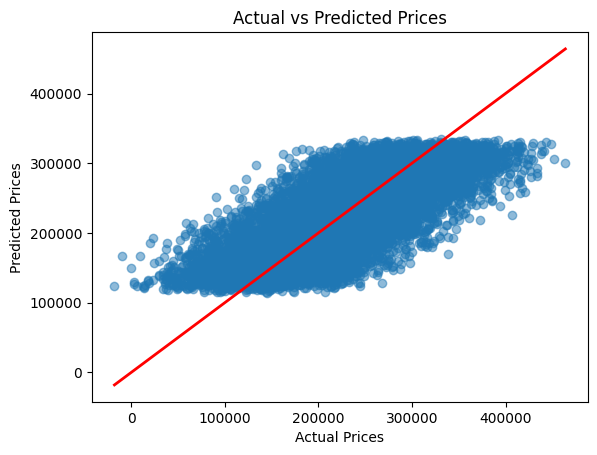

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("housing_price_dataset.csv")

# Round the price data to two decimal places
data['Price'] = data['Price'].round(2)

# Convert categorical values in the dataset to numerical using one-hot encoding
data = pd.get_dummies(data, columns=["Neighborhood"], drop_first=True)

# name the target column
target_column = "Price"

# Split dataset into input features X and target variable y
X = data.drop(target_column, axis=1)
y = data[target_column]

# Split data into training set and test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features
# This is important for many machine learning algorithms to ensure all features contribute equally
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Linear Regression model
model = LinearRegression()

# Train model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Round predicted values to two decimal places for consistency
y_pred = y_pred.round(2)

# Print predictions vs actual values for comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
print(comparison.to_string(index=False))

# Calculate and print evaluation metrics to assess model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

# Plot actual vs. predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
# Plot a diagonal line representing predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()
